<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/95p08of_HARfeedbackFullDatasetEpochBased0430_Test94p88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
# Load data
train_data = np.load('X_train.npy')
train_label = np.load('y_train.npy')
validation_data = np.load('X_validation.npy')
validation_label = np.load('y_validation.npy')
test_data = np.load('X_test.npy')
test_label = np.load('y_test.npy')

In [0]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.031224,0.052527,0.115961,-0.875200,-0.957705,-0.900766,-0.868209,-0.959311,-0.903576,-0.871754,...,0.868067,-1.420373,-1.031076,0.041417,-0.618447,1.179824,0.885911,-0.877134,0.056712,0.119820
1,-0.176101,0.356526,-0.417228,0.311962,0.450204,0.852550,0.306335,0.367644,0.888266,0.245780,...,-0.124388,0.568143,0.749813,0.297311,0.234130,1.557127,1.772883,-0.028307,0.797992,1.281095
2,0.401526,-0.255999,-0.227483,0.724607,1.012197,0.537364,0.702820,1.059839,0.485615,1.002515,...,0.247473,1.222819,1.111675,-1.753009,-0.472243,1.453390,0.416217,-0.390767,0.767157,0.638829
3,0.241090,0.149696,0.354921,-0.829910,-0.829986,-0.777500,-0.821882,-0.817905,-0.772262,-0.844885,...,-0.025308,-0.373414,-0.461477,-0.076678,-0.191304,0.185464,-0.753572,-0.179145,0.956654,0.816782
4,-0.509378,0.598757,1.235366,1.671994,1.222057,2.101020,1.609877,1.248976,1.892042,1.919040,...,-0.105242,0.009285,-0.345760,0.989375,1.564256,-0.593559,0.870385,-0.557192,0.373064,0.783913


In [0]:
train_data_labels.head()

,0
0,3
1,1
2,0
3,4
4,2


In [0]:
test_data.shape

(2947, 561)

In [0]:
validation_data.shape

(1471, 561)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [0]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(7352, 561)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

## without using vaidation data for fitting

In [0]:
clf =MLPClassifier(hidden_layer_sizes=(374, ), max_iter=500, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.01)
# Test set score: 0.950119


clf.fit(train_data, train_label)

Iteration 1, loss = 0.52720526
Iteration 2, loss = 0.15379691
Iteration 3, loss = 0.11074311
Iteration 4, loss = 0.08947817
Iteration 5, loss = 0.07609836
Iteration 6, loss = 0.06703077
Iteration 7, loss = 0.06092138
Iteration 8, loss = 0.05482786
Iteration 9, loss = 0.05074759
Iteration 10, loss = 0.04820633
Iteration 11, loss = 0.04462717
Iteration 12, loss = 0.04117033
Iteration 13, loss = 0.03949230
Iteration 14, loss = 0.03816921
Iteration 15, loss = 0.03526902
Iteration 16, loss = 0.03338227
Iteration 17, loss = 0.03256753
Iteration 18, loss = 0.03047405
Iteration 19, loss = 0.02924046
Iteration 20, loss = 0.02849386
Iteration 21, loss = 0.02730756
Iteration 22, loss = 0.02559763
Iteration 23, loss = 0.02459467
Iteration 24, loss = 0.02391017
Iteration 25, loss = 0.02354070
Iteration 26, loss = 0.02216005
Iteration 27, loss = 0.02149137
Iteration 28, loss = 0.02112266
Iteration 29, loss = 0.02016297
Iteration 30, loss = 0.01943691
Iteration 31, loss = 0.01848743
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(374,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [0]:
clf.score(train_data,train_label)

1.0

#### Validation Accuracy

In [0]:
clf.score(validation_data,validation_label)

0.982324949014276

#### Test accuracy

In [0]:
clf.score(test_data,test_label)

0.9463861554122837

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [0]:
test_label_one_hot.shape

(2947, 6)

#### Base NN model in tensor flow

#### 561 -> 374 -> 6

## Train baseline model in tensorflow

In [0]:
#

In [0]:
train_data.shape

(5881, 561)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

In [0]:
#### Rerun the same thing in tensorflow

In [0]:
# ## Building the graph - Best!
# saver = tf.train.Saver()
# learning_rate = 0.001
# hid_neuron = [374]
# num_steps = 20000
# batch_size = 200
# train_losses = []
# test_acc = []
# X = tf.placeholder("float", [None, train_data.shape[1]])
# Y = tf.placeholder("float", [None, 1+np.max(train_label)])
# def neural_net(x,train = True):
#     layer_outputs = []
#     layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
#     layer_1 = tf.nn.relu(layer_1)
# #     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
# #     layer_2 = tf.nn.relu(layer_2)
#     out_layer = tf.matmul(layer_1, G_W2) + G_b2
#     layer_outputs.append(out_layer)
#     return out_layer

# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# train_op = optimizer.minimize(loss)
# correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#   ### Initialization and running the model
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     best_accuracy_valid = 0
#     for step in range(0, num_steps):
#         batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
#         if step % 1000 == 0:
#             train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
#             train_losses.append(train_loss)
#             validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
#             if step%1000 == 0:
#               print("Validation Accuracy {} ...".format(validation_accuracy))
#               print()
#               if (validation_accuracy >= best_accuracy_valid):
#                 best_accuracy_valid = validation_accuracy
#                 saver.save(sess, './statlog_letter')
#                 test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
#     print("Test acc=",str(test_Accuracy), "%")
#     print("Valid acc=",str(best_accuracy_valid), "%")

#     print("="*50)

In [0]:
validation_data.shape

(1471, 561)

## Divide valid in two parts for validation and validation-test

In [0]:
valid_validation_data = validation_data[0:1000,:]
valid_validation_data_label = validation_label_one_hot[0:1000,:]
valid_test_data = validation_data[1000:,:]
valid_test_data_label = validation_label_one_hot[1000:,:]

#### My model with feedback

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer
G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

num_hidden_neurons = 374
GwLoop = tf.Variable(xavier_init([output_shape,num_hidden_neurons]))
G_bLoop = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GwLoop2 = tf.Variable(xavier_init([num_hidden_neurons,num_hidden_neurons]))
G_bLoop2 = tf.Variable(tf.zeros(shape=[num_hidden_neurons]))

GLossW = tf.Variable(xavier_init([output_shape,output_shape]))
GLossb= tf.Variable(tf.zeros(shape=[output_shape]))
saver = tf.train.Saver()

In [0]:
train_data.shape

(5881, 561)

In [0]:
5881/200

29.405

In [0]:
100000/30

3333.3333333333335

In [0]:
EPOCHS = 3333

In [0]:
from sklearn.utils import shuffle  #train_data, train_label


# Train using epoch based methos

In [119]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 100000
batch_size = 4112
BATCH_SIZE = batch_size
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 10


###
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []
number_of_ex = train_data.shape[0]
total_steps_for_one_pass = number_of_ex//BATCH_SIZE + 1
epoch_track = []
###
learning_rate = 0.01

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]

wLoss1 = 3
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#############
### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for i in range(EPOCHS):
      X_train, y_train = shuffle(train_data, train_label_one_hot)
      
      for step in range(0, total_steps_for_one_pass):
          if step>=number_of_ex//BATCH_SIZE:
            batch_x, batch_y = X_train[step*BATCH_SIZE:,:],y_train[step*BATCH_SIZE:]
            step = 0
          else:
            start = step*BATCH_SIZE
            finish = (step+1)*BATCH_SIZE
            batch_x, batch_y = X_train[step:finish,:],y_train[step:finish]
          sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
      if i % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: X_train,Y: y_train})
          train_accuracy.append(train_acc)
          print("Epoch " + str(i) + '/' + str(EPOCHS) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          train_losses.append(train_loss)
          validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
          val_accuracy.append(validation_accuracy)
          if step%plot_every == 0:
            print("Validation Accuracy {} ...".format(validation_accuracy))
            print()
            if (validation_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validation_accuracy
              saver.save(sess, './HarFull')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    print("="*50)

Epoch 0/3333, training loss= 13.493498, training acc= 79.6633243560791%
Validation Accuracy 79.33378601074219 ...

Epoch 10/3333, training loss= 1.6857285, training acc= 94.04863119125366%
Validation Accuracy 94.08565521240234 ...

Epoch 20/3333, training loss= 0.3384957, training acc= 97.02431559562683%
Validation Accuracy 96.4649887084961 ...

Epoch 30/3333, training loss= 0.13230404, training acc= 98.26560020446777%
Validation Accuracy 96.7369155883789 ...

Epoch 40/3333, training loss= 0.08856975, training acc= 98.53766560554504%
Validation Accuracy 96.80489349365234 ...

Epoch 50/3333, training loss= 0.063261144, training acc= 98.87773990631104%
Validation Accuracy 96.6009521484375 ...

Epoch 60/3333, training loss= 0.049065556, training acc= 99.09879565238953%
Validation Accuracy 96.66893768310547 ...

Epoch 70/3333, training loss= 0.03969408, training acc= 99.25183057785034%
Validation Accuracy 97.07682037353516 ...

Epoch 80/3333, training loss= 0.03411312, training acc= 99.302

In [0]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from scipy.signal import savgol_filter

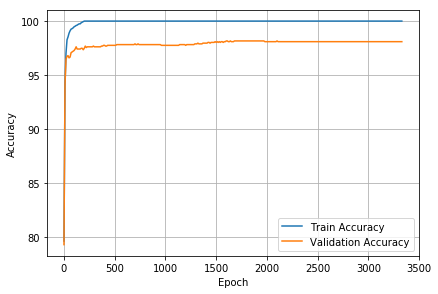

In [121]:
steps_plot =  [step for step in range(0, 3333, plot_every)]
plt.plot(steps_plot, 100*np.asarray(train_accuracy))
plt.plot(steps_plot, val_accuracy)

# plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),11,1))  
# plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),11,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.grid(abs)
plt.show()

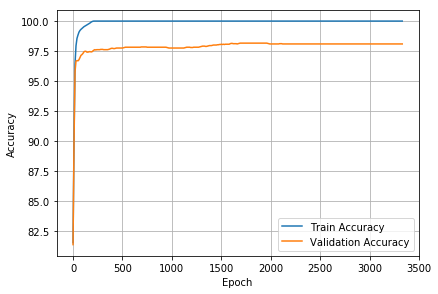

In [122]:
steps_plot =  [step for step in range(0, 3333, plot_every)]
# plt.plot(steps_plot, 100*np.asarray(train_accuracy))
# plt.plot(steps_plot, val_accuracy)

plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),3,1))  
plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),3,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.grid(abs)
plt.show()

In [123]:
valid_accuracy_filtered = val_accuracy#savgol_filter(np.asarray(val_accuracy),51,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

98.16452
160
1600


In [124]:
valid_accuracy_filtered = val_accuracy#savgol_filter(np.asarray(val_accuracy),51,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

98.16452
160
1600


## Now retrain till 1900  epoch with complete data

In [125]:
print(train_label_one_hot.shape)
print(train_valid_combined.shape)

(5881, 6)
(7352, 561)


In [0]:
# keep aside 
aside_examples= 1
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
EPOCHS = 1910

In [128]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 100000
batch_size = 4112
BATCH_SIZE = batch_size
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50


###
validation_accuracy_track = []
train_accuracy_track = []
connection_probability_track = []
number_of_ex = combined_train_valid.shape[0]
total_steps_for_one_pass = number_of_ex//BATCH_SIZE + 1
epoch_track = []
###
learning_rate = 0.0001

X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]

wLoss1 = 3
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


#############
### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for i in range(EPOCHS):
      X_train, y_train = shuffle(combined_train_valid, combined_train_valid_label)
      
      for step in range(0, total_steps_for_one_pass):
          if step>=number_of_ex//BATCH_SIZE:
            batch_x, batch_y = X_train[step*BATCH_SIZE:,:],y_train[step*BATCH_SIZE:]
            step = 0
          else:
            start = step*BATCH_SIZE
            finish = (step+1)*BATCH_SIZE
            batch_x, batch_y = X_train[step:finish,:],y_train[step:finish]
          sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
      if i % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: X_train,Y: y_train})
          train_accuracy.append(train_acc)
          print("Epoch " + str(i) + '/' + str(EPOCHS) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          train_losses.append(train_loss)
          validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
          val_accuracy.append(validation_accuracy)
          if step%plot_every == 0:
            print("Validation Accuracy {} ...".format(validation_accuracy))
            print()
            if (validation_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validation_accuracy
    saver.save(sess, './HArFullBest')
    G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    print("="*50)

Epoch 0/1910, training loss= 0.038889285, training acc= 99.42864775657654%
Validation Accuracy 97.62066650390625 ...

Epoch 50/1910, training loss= 0.0027638515, training acc= 99.91837739944458%
Validation Accuracy 99.59211730957031 ...

Epoch 100/1910, training loss= 0.0014243348, training acc= 99.98639822006226%
Validation Accuracy 99.93202209472656 ...

Epoch 150/1910, training loss= 0.0011546826, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 200/1910, training loss= 0.0009938759, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 250/1910, training loss= 0.0008778551, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 300/1910, training loss= 0.0007857877, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 350/1910, training loss= 0.00070962025, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 400/1910, training loss= 0.00064526976, training acc= 100.0%
Validation Accuracy 100.0 ...

Epoch 450/1910, training loss= 0.0005893623, training acc

In [129]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './HArFullBest')
    train_accuracy = sess.run(accuracy*100, feed_dict={X: X_train,Y: y_train})
    print("Train acc=",str(train_accuracy), "%")
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./HArFullBest
Train acc= 100.0 %
ValidValid acc= 100.0 %
Test acc= 95.07974 %


## Best Tuned, Use W1 = 4, W2 =2, W3 = 1 from best validation accuracy found below

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [374]
num_steps = 100000
batch_size = 200
train_losses = []
test_acc = []
val_accuracy = []
train_accuracy = []


# for h in hid_neuron:
#     num_hidden_neurons=h
learning_rate = 0.001
plot_every = 50


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 4
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            train_accuracy.append(train_acc)
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            val_accuracy.append(validation_accuracy)
            if step%plot_every == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter1')
                G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#                     test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
#         print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")
    ValidAccuracy_Track.append(best_accuracy_valid)
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)

#     validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
#     ValidAccuracy_Test_track.append(validation_test_accuracy)
#     print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
    print("="*50)
    print("W1 = {} ...".format(wLoss1))
    print("W2 = {} ...".format(wLoss2))
    print("W3 = {} ...".format(wLoss3))

    print("*"*50)
    print("="*50)

In [0]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from scipy.signal import savgol_filter

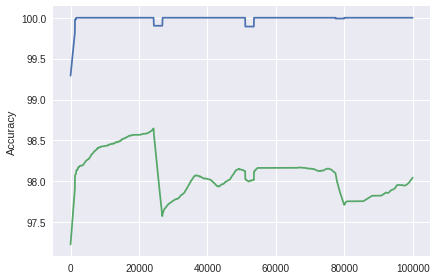

In [0]:
steps_plot =  [step for step in range(0, num_steps, plot_every)]
# plt.plot(steps_plot, 100*np.asarray(train_accuracy))
# plt.plot(steps_plot, val_accuracy)

plt.plot(steps_plot, savgol_filter(100*np.asarray(train_accuracy),51,1))  
plt.plot(steps_plot, savgol_filter(np.asarray(val_accuracy),51,1))
plt.tight_layout()
# plt.xticks(np.arange(min(steps_plot), max(steps_plot)+1, 2000))
plt.ylabel('Accuracy')
plt.grid(abs)
plt.show()

In [0]:
valid_accuracy_filtered = savgol_filter(np.asarray(val_accuracy),51,1)
print(max(valid_accuracy_filtered))
valid_accuracy_filtered_np = np.asarray(valid_accuracy_filtered)
print(np.argmax(valid_accuracy_filtered))
print(steps_plot[np.argmax(valid_accuracy_filtered)])

98.64704
485
24250


In [0]:
print(train_label_one_hot.shape)
print(train_valid_combined.shape)

(5881, 6)
(7352, 561)


In [0]:
# keep aside 
aside_examples= 100
aside_valid_test = train_valid_combined[-aside_examples:]
aside_valid_test_label = validation_test_label_one_hot[-aside_examples:]
combined_train_valid = train_valid_combined[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = validation_test_label_one_hot[:train_valid_combined.shape[0]-aside_examples,:]

#### Now retrain on this appended test data till 24300 steps

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
hid_neuron = [104]
num_steps = 24300
# num_steps = 20000

batch_size = 200
train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50

learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 4
wLoss2 = 2
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % plot_every == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            
            train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
            train_accuracy.append(train_acc_total)
            train_losses.append(train_loss_total)
            print("step " + str(step) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
    
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    saver.save(sess, './Pendigit')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

step 0, training loss Total= 0.45379114, training acc total= 93.14671754837036%
step 50, training loss Total= 0.039833248, training acc total= 99.64147806167603%
step 100, training loss Total= 0.045330588, training acc total= 99.3381142616272%
step 150, training loss Total= 0.019238897, training acc total= 99.79315996170044%
step 200, training loss Total= 0.013733287, training acc total= 99.86210465431213%
step 250, training loss Total= 0.021557797, training acc total= 99.7380018234253%
step 300, training loss Total= 0.15683196, training acc total= 98.17981123924255%
step 350, training loss Total= 0.016487077, training acc total= 99.86210465431213%
step 400, training loss Total= 0.04703603, training acc total= 99.32432174682617%
step 450, training loss Total= 0.01743794, training acc total= 99.82073903083801%
step 500, training loss Total= 0.009342014, training acc total= 99.91726279258728%
step 550, training loss Total= 0.014104057, training acc total= 99.94484186172485%
step 600, tra

In [0]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./Pendigit
ValidValid acc= 99.93202 %
Test acc= 94.876144 %


In [0]:
import scipy.io
best_weights = {'G_W1': G_W1np, 'G_b1': G_b1np,'G_W2': G_W2np, 'G_b2': G_b2np}
scipy.io.savemat('HarFullDataset03212019_Adam', best_weights)

## Verify handover works

In [0]:
from scipy.io import loadmat
x = loadmat('HarFullDataset03212019_Adam.mat')
G_W1np, G_b1np, G_W2np, G_b2np= x['G_W1'],x['G_b1'], x['G_W2'],x['G_b2']

In [0]:
## Building the graph
# saver = tf.train.Saver()

def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1np), G_b1np)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2np) + G_b2np
    layer_outputs.append(out_layer)
    return layer_outputs

correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("Valid acc=",str(validation_accuracy), "%")
    print("Test acc=",str(test_Accuracy), "%")
    print("="*50)

Valid acc= 98.64038 %
Test acc= 95.38514 %


In [0]:
valid_validation_data_label.shape

(1000, 6)

## Hyperparameter tuning by splitting valid into two sets

In [0]:
## Building the graph
# saver = tf.train.Saver()
hid_neuron = [90]
num_steps = 30000
batch_size = 200
train_losses = []
test_acc = []
plot_every = 100
learning_rate = 0.001


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
        layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
        out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,5):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for step in range(0, num_steps):
                batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
                if step % plot_every == 0:
                    train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                    print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                    train_losses.append(train_loss)
                    validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                    if step%plot_every == 0:
                      print("Validation Accuracy valid {} ...".format(validation_accuracy))
                      print()
                      if (validation_accuracy >= best_accuracy_valid):
                        best_accuracy_valid = validation_accuracy
                        saver.save(sess, './statlog_letter')
                        G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)

step 0, training loss= 1.9857837, training acc= 88.99999856948853%
Validation Accuracy valid 87.5999984741211 ...

step 100, training loss= 0.008144151, training acc= 100.0%
Validation Accuracy valid 97.0999984741211 ...

step 200, training loss= 0.0006294729, training acc= 100.0%
Validation Accuracy valid 97.69999694824219 ...

step 300, training loss= 0.0005400359, training acc= 100.0%
Validation Accuracy valid 97.89999389648438 ...

step 400, training loss= 0.1527065, training acc= 97.00000286102295%
Validation Accuracy valid 97.0 ...

step 500, training loss= 0.0013683734, training acc= 100.0%
Validation Accuracy valid 98.0 ...

step 600, training loss= 0.00021194252, training acc= 100.0%
Validation Accuracy valid 97.79999542236328 ...

step 700, training loss= 0.00032862485, training acc= 100.0%
Validation Accuracy valid 97.79999542236328 ...

step 800, training loss= 0.00025341622, training acc= 100.0%
Validation Accuracy valid 98.0999984741211 ...

step 900, training loss= 0.000

KeyboardInterrupt: ignored

#### Valid acc= 98.799995 %
#### Validation Accuracy Test 98.51380157470703 ...
W1 = 4 ...
W2 = 1 ...
W3 = 0 ...
Highest validation accuracy, to brake tie Validation test accuracy was used which is highest for this combination

#### Hyperparameter tuning

In [0]:
max(ValidAccuracy_Track)

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
plt.hist([ValidAccuracy_Track],bins=30)
plt.ylabel('Iter')
plt.show()

In [0]:
plt.plot(ValidAccuracy_Test_track)
plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
plt.hist([ValidAccuracy_Test_track],bins=30)
plt.ylabel('Iter')
plt.show()